[View in Colaboratory](https://colab.research.google.com/github/maromato/BrestTCGA/blob/master/Brest_2.ipynb)

In [0]:
%matplotlib inline
from sklearn.cluster import AffinityPropagation, KMeans, DBSCAN, SpectralClustering
from sklearn.manifold import MDS, TSNE, Isomap
from sklearn.metrics import silhouette_score

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.linalg import logm, expm

In [5]:
from google.colab import files
f=files.upload()

Saving type.txt to type.txt


In [4]:
!ls

b1_mod.txt  b2_mod.txt	b3_mod.txt  b4_mod.txt	datalab


In [0]:
! rm b*

In [0]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse

Preconfiguring packages ...
Selecting previously unselected package cron.
(Reading database ... 18408 files and directories currently installed.)
Preparing to unpack .../00-cron_3.0pl1-128ubuntu5_amd64.deb ...
Unpacking cron (3.0pl1-128ubuntu5) ...
Selecting previously unselected package libapparmor1:amd64.
Preparing to unpack .../01-libapparmor1_2.11.0-2ubuntu17.1_amd64.deb ...
Unpacking libapparmor1:amd64 (2.11.0-2ubuntu17.1) ...
Selecting previously unselected package libdbus-1-3:amd64.
Preparing to unpack .../02-libdbus-1-3_1.10.22-1ubuntu1_amd64.deb ...
Unpacking libdbus-1-3:amd64 (1.10.22-1ubuntu1) ...
Selecting previously unselected package dbus.
Preparing to unpack .../03-dbus_1.10.22-1ubuntu1_amd64.deb ...
Unpacking dbus (1.10.22-1ubuntu1) ...
Selecting previously unselected package dirmngr.
Preparing to unpack .../04-dirmngr_2.1.15-1ubuntu8.1_amd64.deb ...
Unpacking dirmngr (2.1.15-1ubuntu8.1) ...
Selecting previously unselected package distro-info-data.
Preparing to unpack .

Setting up dirmngr (2.1.15-1ubuntu8.1) ...
Setting up cron (3.0pl1-128ubuntu5) ...
Adding group `crontab' (GID 102) ...
Done.
update-rc.d: warning: start and stop actions are no longer supported; falling back to defaults
update-rc.d: warning: stop runlevel arguments (1) do not match cron Default-Stop values (none)
invoke-rc.d: could not determine current runlevel
invoke-rc.d: policy-rc.d denied execution of start.
Setting up libdbus-1-3:amd64 (1.10.22-1ubuntu1) ...
Setting up kmod (24-1ubuntu2) ...
Setting up libdbus-glib-1-2:amd64 (0.108-2) ...
Setting up python3-gi (3.24.1-2build1) ...
Setting up module-init-tools (24-1ubuntu2) ...
Setting up python3-software-properties (0.96.24.17) ...
Setting up dbus (1.10.22-1ubuntu1) ...
Setting up python-apt (1.4.0~beta3build2) ...
Setting up python3-dbus (1.2.4-1build3) ...
Setting up python-software-properties (0.96.24.17) ...
Setting up software-properties-common (0.96.24.17) ...
Processing triggers for libc-bin (2.26-0ubuntu2.1) ...
Processi

In [0]:
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()

In [0]:
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
Please enter the verification code: Access token retrieved correctly.


In [0]:
!mkdir -p drive
!google-drive-ocamlfuse drive
!ls drive/Breast_TCGA_Transcriptome-RNAseq_HTseq-FPKM

fuse: mountpoint is not empty
fuse: if you are sure this is safe, use the 'nonempty' mount option
b2.txt	BREAST_FPKM.tar.gz  gdc_sample_sheet.2018-07-31.xlsx  Rplot03.png
b3.txt	b.txt		    Rplot01.png			      Rplot04.png
b4.txt	clinical_data.xlsx  Rplot02.png


In [0]:
ls drive

01-Oct-2016_20160930_P_FLOW.xls
04-Oct-2016.xls
11-Sep-2016_20160908-9.xls
14-Oct-2016-20161011_pFlow.xls
14-Oct-2016-20161011_surface.xls
14-Oct-2016_20161013_PFlow.xls
14-Oct-2016_20161013_surface.xls
15-Aug-2016_20160725_0801_P-FLOW.xls
15-Aug-2016._20160725_surfacexls.xls
15-Aug-2016_20160727_0801_2.xls
15-Aug-2016_20160727_0801_Surface.xls
17-Sep-2016_pFLow.xls
17-Sep-2016_US.xls
20160106_Miseq/
20160404-28_CSV.zip
20160518-25_CSV.zip
20160530-0606_CSV.zip
20160911-FACS2.pptx
20160911_FACS.pptx
20160917_FACS.pptx
20160930_FACS.pptx
20161101_FM4_VPDCD4_GNB1.xls
20161104-2.tif
20161104.tif
20161224_kallisto_analysis/
20161224_Miseq/
2016 system based-20170605T024004Z-001.zip
21-Jun-2016_20160518_25_2.xls
21-Jun-2016_20160518_25.xls
21-Jun-2016_20160530_0606.xls
25-Apr-2016_20160413.xls
25-Sep-2016-Layout-Batch.pdf
25-Sep-2016.xls
27-Sep-2016.xls
28-Sep-2016-1.xls
29-Sep-2016.xls
30-Jun-2016_20160623_29_pFlow.xls
30-Jun-2016_20160624-29-SURFACE.xls
30-Sep-2016_20150907-14_P_Flow.xls


In [0]:
!cp  drive/Breast*/b*.txt ./

In [0]:
!ls


b2.txt	b3.txt	b4.txt	b.txt  datalab	drive  RNAseq_unsupervised_2.ipynb


In [4]:
df_wine = pd.read_csv("b_mod_5.txt", sep="\t", header=0, index_col=0)
df_wine_2 = df_wine.T
print(df_wine_2)
df_wine_2.shape

                                                   ENSG00000167578.15  \
X0000772b.773d.4cf8.8baf.0e1e6dbf55e8.FPKM.txt.gz            1.257277   
X003d640d.3bfc.4791.b241.4a3206d49468.FPKM.txt.gz            1.513782   
X00511204.3512.4a5e.b664.60271e968903.FPKM.txt.gz            1.072726   
X00587432.3004.4d4b.9dc2.8c90c81f7640.FPKM.txt.gz            1.800092   
X0094a627.a55f.48dc.bbc3.ea66035e514a.FPKM.txt.gz            1.145059   
X009ff7e3.8bd3.4683.adf5.7b68a0859f35.FPKM.txt.gz            1.640353   
X00a47e69.ef6a.4be9.827d.d48609859a7e.FPKM.txt.gz            1.356805   
X00b24800.9f29.47e9.99c9.eba03186adf4.FPKM.txt.gz            1.062609   
X019a5486.ad80.44b4.a9e3.7e7f93e8e6fa.FPKM.txt.gz            0.930733   
X01a1c77a.3f93.4561.a079.c771ac054f56.FPKM.txt.gz            1.210724   
X01cdf894.fd1d.42c0.866b.10c68cde7c54.FPKM.txt.gz            1.434597   
X01f17467.b7de.49d4.a9d7.00108f4de1f9.FPKM.txt.gz            1.035552   
X020fd3f7.63fb.4995.b96d.6c18bf292e14.FPKM.txt.gz  

(299, 13231)

In [6]:
b1  = pd.read_csv("b1_mod.txt", sep="\t", header=0, index_col=0)
b1.shape


(13231, 299)

In [7]:
b2  = pd.read_csv("b2_mod.txt", sep="\t", header=0, index_col=0)
b2.shape


(13231, 301)

In [8]:
b3  = pd.read_csv("b3_mod.txt", sep="\t", header=0, index_col=0)
b3.shape


(13231, 299)

In [19]:
b4  = pd.read_csv("b4_mod.txt", sep="\t", header=0, index_col=0)
b4.shape
b4

,bcae978c.e9b1.4c7a.8691.caf718db5b3a.FPKM.txt.gz,bceffa81.996d.4775.a452.23b31a25daf9.FPKM.txt.gz,bcf137e8.156d.4609.8b1b.9a9b379aa2ce.FPKM.txt.gz,bd3834fb.9a9b.4a7b.880f.b4073f51bd31.FPKM.txt.gz,bd556315.a050.465f.9a41.bdebe7e3eb61.FPKM.txt.gz,bd7bf37d.b076.4e82.bc73.83454dba8ff1.FPKM.txt.gz,bdc7d527.3905.4905.b245.b282883ea3a6.FPKM.txt.gz,bdceb6c5.77d1.43e6.9046.1340502c2a60.FPKM.txt.gz,bdd8c340.250b.474a.8802.7653b7884ced.FPKM.txt.gz,be0d2e41.7373.4fa9.9c05.877e9ddcb88c.FPKM.txt.gz,...,fd9be810.7e9e.4697.99b1.70a5c5901e07.FPKM.txt.gz,fdc8ad41.ba94.485d.8bd6.6ea2794847f2.FPKM.txt.gz,fe07bbb2.6d46.44b4.8363.1e1b8d648660.FPKM.txt.gz,fe613719.8ab9.4a9b.9db9.dd5d473d2a1c.FPKM.txt.gz,fe6c451e.0747.4a02.9d35.59d0a9f4a468.FPKM.txt.gz,fe86fbf3.07cb.4d29.bc2b.58c5fbcd275c.FPKM.txt.gz,ff1a6ac0.ed5a.4736.8e76.083d33edb720.FPKM.txt.gz,ff41537c.7cf5.4899.86b0.e1b2a2b7d463.FPKM.txt.gz,ff850c31.bb15.47a2.bd3d.2590ca013e68.FPKM.txt.gz,ffd7b10e.8c0c.4aeb.81a0.b060108d57fa.FPKM.txt.gz
ENSG00000167578.15,1.588858,1.914721,0.914385,1.726438,1.076173,1.326520,2.306850,1.432527,1.403735,1.366344,...,1.467366,1.519650,1.466766,0.958370,1.420833,0.836877,1.653675,1.043112,1.835462,1.777766
ENSG00000078237.5,1.871936,0.771038,1.578592,0.543553,1.645156,1.494725,1.079296,1.398117,1.985715,1.248022,...,1.593201,2.003333,1.017721,1.356647,1.725537,1.902699,1.457709,1.409538,1.269996,1.215427
ENSG00000146083.10,2.642163,1.920205,2.477232,1.619319,2.758341,2.441589,2.306329,2.080235,2.091856,1.938753,...,2.588904,3.157014,2.537219,2.376999,2.288636,2.375455,2.470140,2.289520,2.629880,2.819338
ENSG00000198242.12,5.124402,6.078314,5.185065,4.961519,4.545794,4.828660,5.192849,4.685952,5.283865,4.177850,...,4.985970,5.101115,5.208385,5.142053,4.818721,4.782232,4.711471,4.947459,4.899939,5.091511
ENSG00000134108.11,3.784851,3.294203,3.262478,3.092105,3.678610,3.332430,3.947996,3.557150,3.564900,3.389455,...,3.686009,3.645762,3.744730,3.525467,3.560091,3.171968,3.419646,3.773147,3.842532,3.506509
ENSG00000172137.17,2.410131,1.280918,3.394045,0.369284,1.869485,1.112787,0.798013,2.061831,0.999849,0.627183,...,0.708253,1.275238,1.626987,2.178033,0.891674,2.377374,2.145045,0.891585,0.281947,0.472559
ENSG00000167700.7,1.868630,3.990043,2.682527,2.894406,1.605112,2.511158,2.841147,2.409436,2.357763,1.890746,...,2.241750,4.263676,3.516729,1.429110,2.463067,2.079027,2.369945,1.511408,3.441327,3.129823
ENSG00000060642.9,2.031527,2.325521,1.862785,1.284037,1.842362,2.296596,2.794886,1.994543,2.507252,1.934160,...,2.296320,1.513926,2.249626,1.762659,2.580727,1.871939,1.713317,2.340428,2.730474,2.592928
ENSG00000182141.8,1.442627,0.803329,1.173634,0.767585,0.877346,1.305861,1.313952,1.118841,1.561375,1.204912,...,1.338536,0.761646,1.254221,0.994769,1.239358,1.021059,0.938571,1.356863,1.519894,1.045871
ENSG00000070087.12,3.166485,3.692395,3.529072,1.780431,4.337825,3.440283,3.231664,2.303758,2.623890,3.256362,...,2.687464,2.995712,3.686045,4.359452,3.197386,4.092190,3.302772,2.706162,3.578165,3.201928


In [22]:
df_wine = pd.concat([b1,b2,b3,b4],axis=1)
df_wine.shape
df_wine

,X0000772b.773d.4cf8.8baf.0e1e6dbf55e8.FPKM.txt.gz,X003d640d.3bfc.4791.b241.4a3206d49468.FPKM.txt.gz,X00511204.3512.4a5e.b664.60271e968903.FPKM.txt.gz,X00587432.3004.4d4b.9dc2.8c90c81f7640.FPKM.txt.gz,X0094a627.a55f.48dc.bbc3.ea66035e514a.FPKM.txt.gz,X009ff7e3.8bd3.4683.adf5.7b68a0859f35.FPKM.txt.gz,X00a47e69.ef6a.4be9.827d.d48609859a7e.FPKM.txt.gz,X00b24800.9f29.47e9.99c9.eba03186adf4.FPKM.txt.gz,X019a5486.ad80.44b4.a9e3.7e7f93e8e6fa.FPKM.txt.gz,X01a1c77a.3f93.4561.a079.c771ac054f56.FPKM.txt.gz,...,fd9be810.7e9e.4697.99b1.70a5c5901e07.FPKM.txt.gz,fdc8ad41.ba94.485d.8bd6.6ea2794847f2.FPKM.txt.gz,fe07bbb2.6d46.44b4.8363.1e1b8d648660.FPKM.txt.gz,fe613719.8ab9.4a9b.9db9.dd5d473d2a1c.FPKM.txt.gz,fe6c451e.0747.4a02.9d35.59d0a9f4a468.FPKM.txt.gz,fe86fbf3.07cb.4d29.bc2b.58c5fbcd275c.FPKM.txt.gz,ff1a6ac0.ed5a.4736.8e76.083d33edb720.FPKM.txt.gz,ff41537c.7cf5.4899.86b0.e1b2a2b7d463.FPKM.txt.gz,ff850c31.bb15.47a2.bd3d.2590ca013e68.FPKM.txt.gz,ffd7b10e.8c0c.4aeb.81a0.b060108d57fa.FPKM.txt.gz
ENSG00000167578.15,1.257277,1.513782,1.072726,1.800092,1.145059,1.640353,1.356805,1.062609,0.930733,1.210724,...,1.467366,1.519650,1.466766,0.958370,1.420833,0.836877,1.653675,1.043112,1.835462,1.777766
ENSG00000078237.5,1.412900,1.873770,1.079453,1.481580,1.332484,1.002187,1.618533,1.417833,1.539786,1.728553,...,1.593201,2.003333,1.017721,1.356647,1.725537,1.902699,1.457709,1.409538,1.269996,1.215427
ENSG00000146083.10,2.867841,2.180168,1.570660,2.432120,2.555844,2.243199,2.538735,2.268569,2.170672,2.126794,...,2.588904,3.157014,2.537219,2.376999,2.288636,2.375455,2.470140,2.289520,2.629880,2.819338
ENSG00000198242.12,4.462736,4.350524,4.448730,5.362483,4.796368,4.923111,5.238211,4.723912,5.073803,4.834167,...,4.985970,5.101115,5.208385,5.142053,4.818721,4.782232,4.711471,4.947459,4.899939,5.091511
ENSG00000134108.11,2.250525,3.743293,3.297222,3.470477,3.879598,4.016415,3.997320,3.216787,3.528561,3.369103,...,3.686009,3.645762,3.744730,3.525467,3.560091,3.171968,3.419646,3.773147,3.842532,3.506509
ENSG00000172137.17,0.442087,3.510356,4.964127,0.277056,0.357493,0.826018,1.771175,1.649741,3.430161,2.865719,...,0.708253,1.275238,1.626987,2.178033,0.891674,2.377374,2.145045,0.891585,0.281947,0.472559
ENSG00000167700.7,1.014440,2.082692,1.444374,3.657784,2.952850,3.086225,2.516541,2.187630,1.689392,2.213907,...,2.241750,4.263676,3.516729,1.429110,2.463067,2.079027,2.369945,1.511408,3.441327,3.129823
ENSG00000060642.9,1.501538,2.106853,1.716580,2.723297,2.720327,2.755764,2.378836,1.877943,2.099534,1.645239,...,2.296320,1.513926,2.249626,1.762659,2.580727,1.871939,1.713317,2.340428,2.730474,2.592928
ENSG00000182141.8,2.037531,1.268588,0.702398,1.400170,1.012547,1.003701,0.803734,0.884353,1.349727,1.147979,...,1.338536,0.761646,1.254221,0.994769,1.239358,1.021059,0.938571,1.356863,1.519894,1.045871
ENSG00000070087.12,3.113026,4.048568,2.568967,3.651862,3.566334,1.498611,3.270090,2.069051,3.077677,3.370209,...,2.687464,2.995712,3.686045,4.359452,3.197386,4.092190,3.302772,2.706162,3.578165,3.201928


In [0]:
df_wine.to_csv('./breast.txt', sep='\t')

In [24]:
!ls

b1_mod.txt  b3_mod.txt	breast.txt  datalab
b2_mod.txt  b4_mod.txt	brest.txt   type.txt


In [26]:

df_wine_2 = df_wine.T
#print(df_wine_2)
df_wine_2.shape

(1222, 13231)

In [0]:
c = pd.read_csv("type.txt", sep="\t", header=0)

In [38]:
c = c.T

d = c.iloc[0,:].values
d.shape

(1222,)

In [32]:

X = df_wine_2.iloc[0:, 1:].values
X.shape

(1222, 13230)

In [6]:
#df_wine_2 = pd.DataFrame(df_wine_2)

#X, Y = df_wine_2.iloc[:, 1:].values, df_wine_2.iloc[:, 0].values

X = df_wine_2.iloc[0:, 1:].values
#X = X.astype(float)

#X = (X - X.mean(axis=0))/X.std(axis=0)


X = pd.DataFrame(X)
X.shape

(299, 13230)

In [31]:
X

array([[1.41289957, 2.86784147, 4.46273581, ..., 2.33350782, 1.45179976,
        2.04178601],
       [1.87376988, 2.18016755, 4.35052427, ..., 2.91411433, 1.91950193,
        2.17817166],
       [1.07945254, 1.57065961, 4.4487298 , ..., 1.1715526 , 0.07487332,
        1.88237257],
       ...,
       [1.40953806, 2.28951987, 4.94745924, ..., 0.93386933, 1.36922319,
        2.27216916],
       [1.26999608, 2.62988008, 4.89993878, ..., 1.85892428, 0.85006921,
        2.87593543],
       [1.21542724, 2.81933808, 5.09151102, ..., 1.77039961, 0.95372655,
        2.63663975]])

In [0]:
mds = MDS()
mds_coords = mds.fit_transform(X)

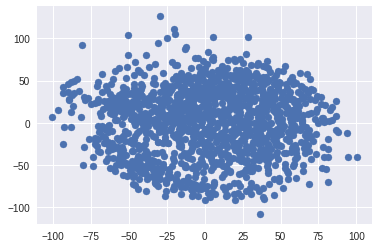

In [34]:
plt.scatter(mds_coords[:,0], mds_coords[:,1])

In [39]:
pre_cluster_lables = d
pre_cluster_lables

array([1, 1, 0, ..., 1, 1, 1])

1222


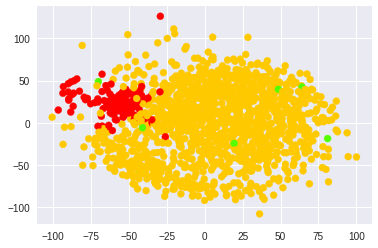

In [40]:
# Colour the clusters by cluster number, then plot on MDS plot.

pre_cluster_lables =d
print(len(pre_cluster_lables))                          
#pre_cluster_lables

cmap = plt.cm.get_cmap('prism', len(pre_cluster_lables))
cmap
plt.scatter(mds_coords[:,0], mds_coords[:,1], c=pre_cluster_lables, cmap=cmap)

In [0]:
ISO = Isomap()
ISO_coords = ISO.fit_transform(X)

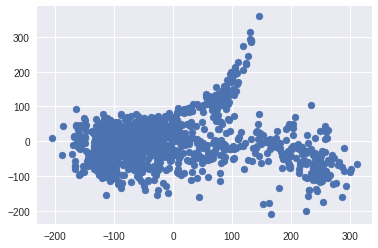

In [42]:
plt.scatter(ISO_coords[:,0], ISO_coords[:,1])

1222


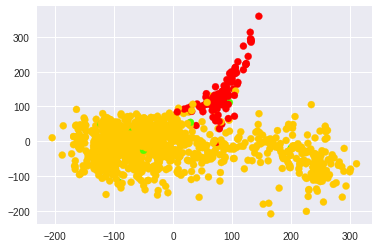

In [43]:
pre_cluster_lables =d
print(len(pre_cluster_lables))                          
#pre_cluster_lables

cmap = plt.cm.get_cmap('prism', len(pre_cluster_lables))
cmap
plt.scatter(ISO_coords[:,0], ISO_coords[:,1], c=pre_cluster_lables, cmap=cmap)

In [44]:
ap = AffinityPropagation()
ap_cluster_labels = ap.fit_predict(X)  # gets the cluster labels.
ap_cluster_labels

array([65, 23, 67, ..., 58, 31, 35])

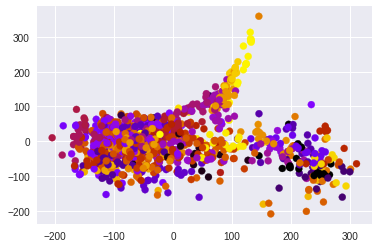

In [45]:
len(ap_cluster_labels)

cmap = plt.cm.get_cmap('gnuplot', len(ap_cluster_labels))

plt.scatter(ISO_coords[:,0], ISO_coords[:,1], c=ap_cluster_labels, cmap=cmap)

In [46]:
km = KMeans(n_clusters=6)
km_cluster_labels = km.fit_predict(X)
km_cluster_labels

array([3, 0, 5, ..., 2, 2, 1], dtype=int32)

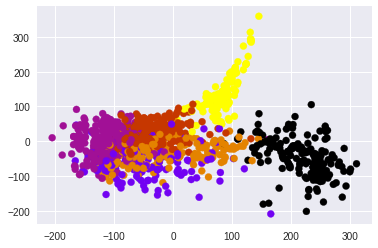

In [47]:
cmap = plt.cm.get_cmap('gnuplot', len(km_cluster_labels))

plt.scatter(ISO_coords[:,0], ISO_coords[:,1], c=km_cluster_labels, cmap=cmap)

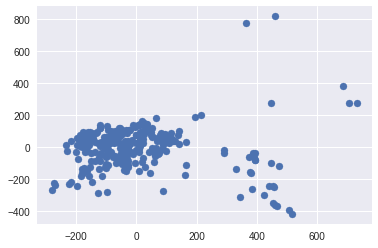

In [14]:
plt.scatter(ISO_coords[:,0], ISO_coords[:,1])

In [0]:
TS = TSNE()
TS_coords = TS.fit_transform(X)

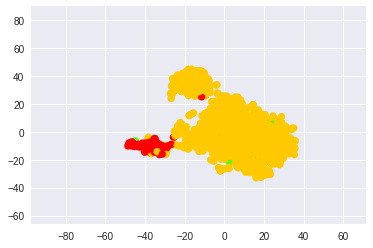

In [49]:
plt.xlim(min(TS_coords[:,0])*2,max(TS_coords[:,0])*2)
plt.ylim(min(TS_coords[:,1])*2,max(TS_coords[:,1])*2)
cmap = plt.cm.get_cmap('prism', len(km_cluster_labels))
plt.scatter(TS_coords[:,0], TS_coords[:,1], c=pre_cluster_lables, cmap=cmap)

1222


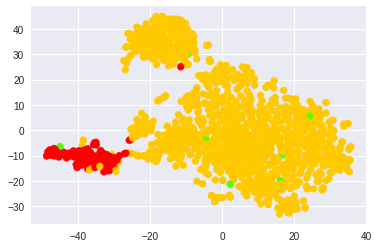

In [51]:
pre_cluster_lables =d
print(len(pre_cluster_lables))                          
#pre_cluster_lables

cmap = plt.cm.get_cmap('prism', len(pre_cluster_lables))

plt.scatter(TS_coords[:,0], TS_coords[:,1], c=pre_cluster_lables, cmap=cmap)

In [57]:
km = KMeans(n_clusters=5)
km_cluster_labels = km.fit_predict(X)
km_cluster_labels

array([0, 2, 3, 1, 4, 1, 4, 4, 3, 2, 2, 3, 1, 1, 1, 2, 4, 1, 4, 2, 2, 2,
       4, 4, 4, 2, 1, 4, 1, 4, 4, 1, 3, 1, 4, 1, 3, 4, 2, 1, 1, 1, 2, 0,
       4, 1, 2, 2, 4, 4, 3, 4, 0, 4, 4, 4, 4, 1, 1, 4, 2, 2, 3, 4, 0, 1,
       4, 0, 4, 4, 3, 2, 2, 4, 2, 4, 2, 2, 3, 1, 4, 4, 3, 4, 1, 1, 2, 4,
       2, 4, 1, 1, 4, 4, 4, 4, 3, 4, 1, 3, 4, 2, 2, 1, 2, 4, 3, 1, 1, 2,
       4, 4, 1, 4, 4, 1, 4, 2, 4, 3, 3, 1, 4, 3, 4, 4, 4, 4, 4, 4, 4, 2,
       4, 1, 1, 2, 4, 3, 4, 4, 2, 2, 4, 1, 4, 4, 1, 3, 4, 1, 4, 4, 3, 4,
       2, 4, 2, 1, 1, 4, 4, 1, 1, 4, 4, 1, 1, 4, 1, 4, 1, 1, 4, 4, 4, 4,
       1, 4, 3, 1, 3, 2, 1, 0, 1, 4, 4, 2, 4, 2, 3, 1, 3, 3, 0, 2, 4, 4,
       4, 4, 4, 4, 4, 2, 3, 2, 4, 3, 1, 1, 4, 4, 3, 4, 4, 4, 2, 4, 4, 3,
       2, 4, 2, 4, 4, 2, 4, 1, 1, 1, 4, 3, 4, 4, 1, 2, 1, 3, 3, 2, 4, 1,
       3, 3, 4, 3, 1, 3, 4, 1, 2, 4, 4, 1, 1, 4, 1, 4, 4, 1, 2, 2, 4, 3,
       1, 4, 4, 2, 1, 4, 2, 1, 1, 1, 4, 3, 2, 2, 4, 4, 1, 3, 1, 4, 1, 1,
       1, 4, 4, 4, 4, 3, 1, 2, 4, 4, 4, 4, 4], dtyp

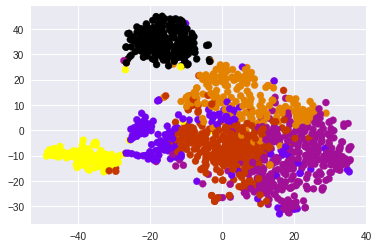

In [52]:
cmap = plt.cm.get_cmap('gnuplot', len(km_cluster_labels))

plt.scatter(TS_coords[:,0], TS_coords[:,1], c=km_cluster_labels, cmap=cmap)

In [60]:
print(cmap)

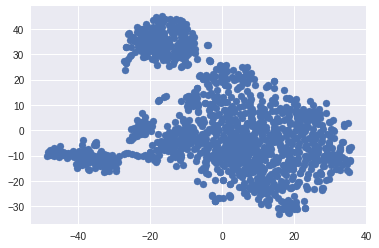

In [50]:

plt.scatter(TS_coords[:,0], TS_coords[:,1])